In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("DataScience_salaries_2024.csv", usecols = ['experience_level', 'job_title'])
df.dropna()
df.drop_duplicates(inplace=True)

In [3]:
df

,experience_level,job_title
0,MI,Data Scientist
1,MI,BI Data Analyst
3,MI,ML Engineer
4,SE,Lead Machine Learning Engineer
6,SE,Data Science Manager
...,...,...
14751,EN,Data Analytics Manager
14800,EN,Data Quality Engineer
14818,EN,Data Analytics Engineer
14823,EN,Data Analyst Lead


## Đồ thị ban đầu 2 phía

In [4]:
import networkx as nx
from networkx.algorithms import bipartite

In [5]:
B = nx.Graph()
job_title = df['job_title']
experience_level = df['experience_level']
print(job_title.nunique())
print(experience_level.nunique())
print(len(df))

153
4
334


In [6]:
for index, row in df.iterrows():
    B.add_edge(row['job_title'], row['experience_level'], weight = 1)
B.add_nodes_from(job_title, bipartile = 0)
B.add_nodes_from(experience_level, bipartile = 1)

<Figure size 1200x1200 with 0 Axes>

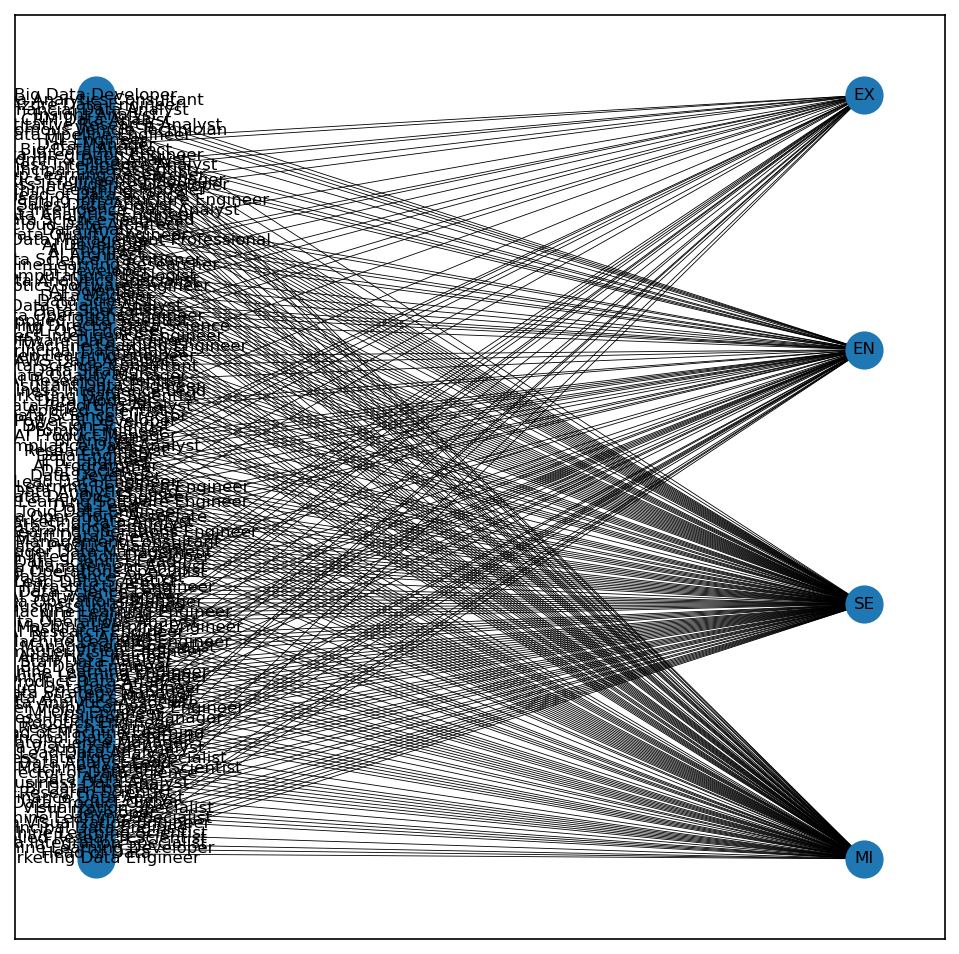

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(B)
fig, ax = plt.subplots(1, 1, figsize=(8, 8), dpi=150)
nx.draw_networkx(B, pos=nx.drawing.layout.bipartite_layout(B,job_title), font_size=8, width=0.4)
plt.show()

## Đồ thị 1 phía

In [8]:
job_title_col = df['job_title'].unique()

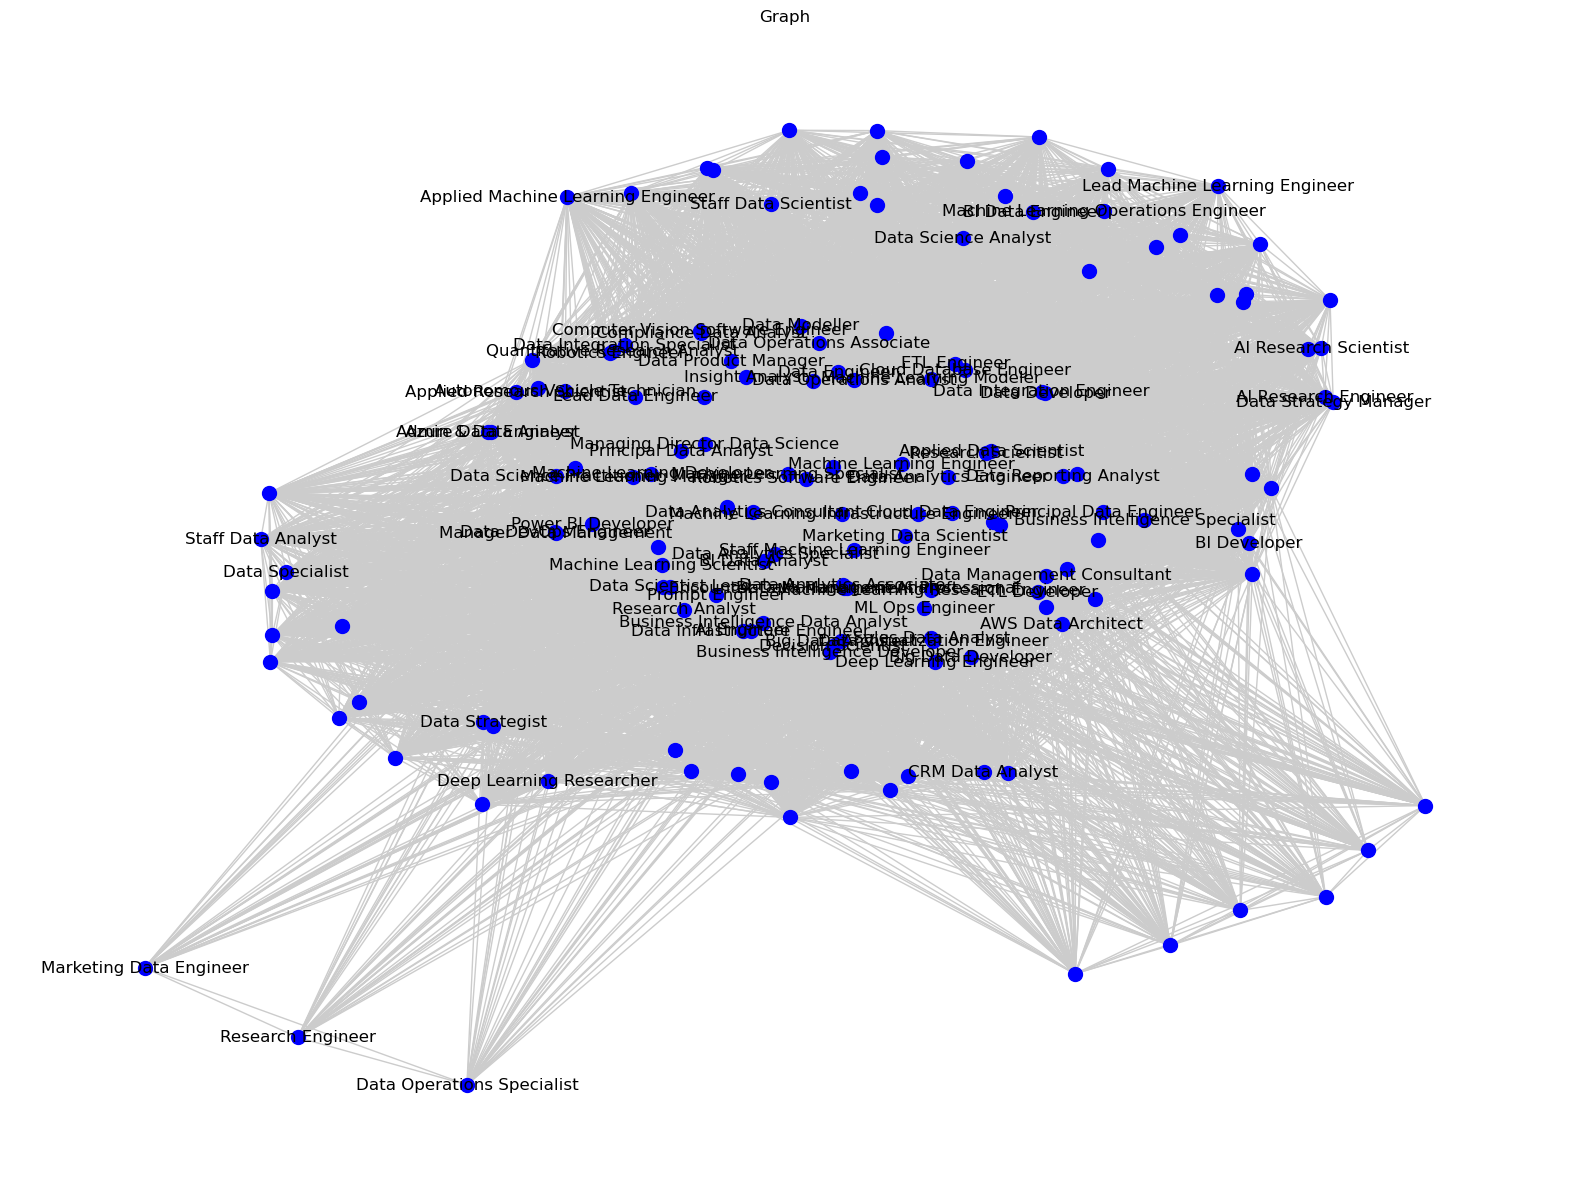

In [9]:
G = bipartite.weighted_projected_graph(B, job_title_col)
plt.figure(figsize=(20,15))
layout = nx.spring_layout(G)
nx.draw_networkx_nodes(G,
                      layout,
                      nodelist= job_title_col,
                      node_size=100,
                      node_color='blue')
nx.draw_networkx_edges(G,layout, edge_color = '#cccccc')
node_labels = dict(zip(job_title, job_title_col))
nx.draw_networkx_labels(G,layout,labels=node_labels)
plt.axis('off')
plt.title('Graph')
plt.show()

In [10]:
labels = nx.get_edge_attributes(G,'weight')
data = [{'source': key[0], 'target': key[1], 'weight': value} for key, value in labels.items()]
df2 = pd.DataFrame(data)
df2.to_csv(r'mydatatest.csv', index = False, header = True)

## Trích ra đồ thị 10 đỉnh ngẫu nhiên

In [12]:
import random
random_nodes = random.sample(list(G.nodes()), 10)
#random_nodes = ['BI Analyst', 'Data Quality Analyst', 'AI Research Engineer', 'Research Engineer', 'Decision Scientist', 'Data Pipeline Engineer',
#               'AI Engineer', 'Business Data Analyst', 'Compliance Data Analyst', 'Data Product Manager']
		

In [13]:
random_nodes

['BI Analyst',
 'Data Quality Analyst',
 'AI Research Engineer',
 'Research Engineer',
 'Decision Scientist',
 'Data Pipeline Engineer',
 'AI Engineer',
 'Business Data Analyst',
 'Compliance Data Analyst',
 'Data Product Manager']

In [14]:
df2 = df.loc[df['job_title'].isin(random_nodes)]

In [15]:
B1 = nx.Graph()

In [16]:
for index, row in df2.iterrows():
    B1.add_edge(row['job_title'], row['experience_level'], weight = 1)
B1.add_nodes_from(random_nodes, bipartile = 0)
B1.add_nodes_from(experience_level, bipartile = 1)

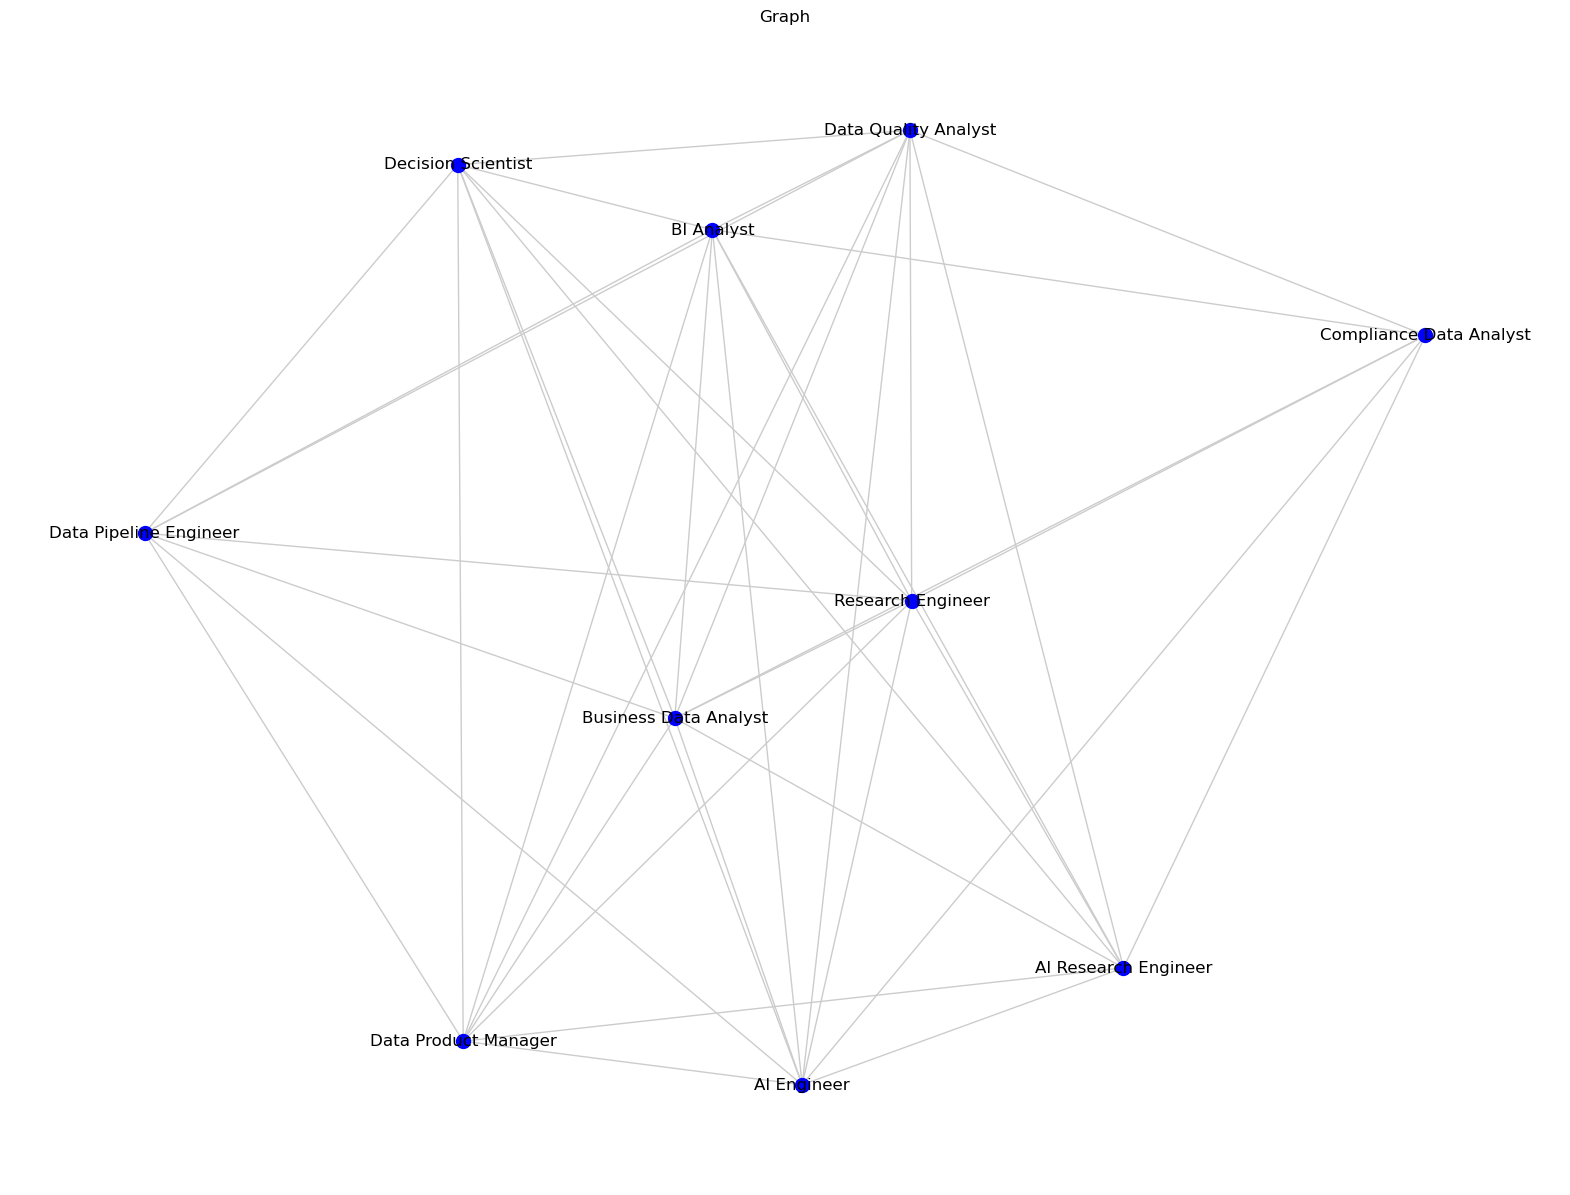

In [17]:
G1 = bipartite.weighted_projected_graph(B1, random_nodes)
plt.figure(figsize=(20,15))
layout = nx.spring_layout(G1)
nx.draw_networkx_nodes(G1,
                      layout,
                      nodelist= random_nodes,
                      node_size=100,
                      node_color='blue')
nx.draw_networkx_edges(G1,layout, edge_color = '#cccccc')
node_labels = dict(zip(random_nodes, random_nodes))
nx.draw_networkx_labels(G1,layout,labels=node_labels)
plt.axis('off')
plt.title('Graph')
plt.show()

In [30]:
labels = nx.get_edge_attributes(G1,'weight')
data = [{'source': key[0], 'target': key[1], 'weight': value} for key, value in labels.items()]
df3 = pd.DataFrame(data)
df3.to_csv(r'mydatatest1.csv', index = False, header = True)

### Harmonic 

In [19]:
clustering = []
for node in random_nodes:
    clustering.append(nx.harmonic_centrality(G1, [node]))

In [20]:
clustering

[{'BI Analyst': 9.0},
 {'Data Quality Analyst': 9.0},
 {'AI Research Engineer': 8.5},
 {'Research Engineer': 9.0},
 {'Decision Scientist': 8.5},
 {'Data Pipeline Engineer': 8.0},
 {'AI Engineer': 9.0},
 {'Business Data Analyst': 9.0},
 {'Compliance Data Analyst': 7.5},
 {'Data Product Manager': 8.5}]

In [21]:
positions = clustering
sorted_positions = sorted(positions, key=lambda x: list(x.values())[0])
for position in sorted_positions:
    print(position)

{'Compliance Data Analyst': 7.5}
{'Data Pipeline Engineer': 8.0}
{'AI Research Engineer': 8.5}
{'Decision Scientist': 8.5}
{'Data Product Manager': 8.5}
{'BI Analyst': 9.0}
{'Data Quality Analyst': 9.0}
{'Research Engineer': 9.0}
{'AI Engineer': 9.0}
{'Business Data Analyst': 9.0}


### Betweeness

In [22]:
betweenness = nx.betweenness_centrality(G1)
for node in random_nodes:
    print(f"Đỉnh {node}: {betweenness[node]*10000}")

Đỉnh BI Analyst: 187.83068783068782
Đỉnh Data Quality Analyst: 187.83068783068782
Đỉnh AI Research Engineer: 92.59259259259258
Đỉnh Research Engineer: 187.83068783068782
Đỉnh Decision Scientist: 39.682539682539684
Đỉnh Data Pipeline Engineer: 0.0
Đỉnh AI Engineer: 187.83068783068782
Đỉnh Business Data Analyst: 187.83068783068782
Đỉnh Compliance Data Analyst: 0.0
Đỉnh Data Product Manager: 39.682539682539684


### Pagerank

In [23]:
pagerank = nx.pagerank(G1)
for node in random_nodes:
    print(f"Đỉnh {node}: {pagerank[node]*10000}")

Đỉnh BI Analyst: 1259.590946198296
Đỉnh Data Quality Analyst: 1259.590946198296
Đỉnh AI Research Engineer: 863.9031553921801
Đỉnh Research Engineer: 1259.590946198296
Đỉnh Decision Scientist: 917.4621074884767
Đỉnh Data Pipeline Engineer: 529.069072632577
Đỉnh AI Engineer: 1259.590946198296
Đỉnh Business Data Analyst: 1259.590946198296
Đỉnh Compliance Data Analyst: 474.14882600681204
Đỉnh Data Product Manager: 917.4621074884767


## EigenVector, EigenValue

In [31]:
eigenvector_centrality = nx.eigenvector_centrality(G1)
sorted_eigenvector_centrality = sorted(eigenvector_centrality.items(), key=lambda x:x[1], reverse = True)

In [34]:
adjacency_matrix = nx.adjacency_matrix(G1).T.toarray()
eigenvalues, eigenvectors = np.linalg.eig(adjacency_matrix)
eigenvalue_centrality = np.abs(eigenvectors[:,0]) / np.linalg.norm(eigenvectors[:,0])
sorted_eigenvalue_centrality = sorted(enumerate(eigenvalue_centrality), key=lambda x:x[1], reverse = True)

In [37]:
for node, centrality in sorted_eigenvector_centrality:
    print(f"Đỉnh {node}: {centrality}")

Đỉnh BI Analyst: 0.3385584517829876
Đỉnh Data Quality Analyst: 0.3385584517829876
Đỉnh Research Engineer: 0.3385584517829876
Đỉnh AI Engineer: 0.3385584517829876
Đỉnh Business Data Analyst: 0.3385584517829876
Đỉnh Decision Scientist: 0.31260657154166105
Đỉnh Data Product Manager: 0.31260657154166105
Đỉnh AI Research Engineer: 0.30849978325373023
Đỉnh Data Pipeline Engineer: 0.27941947139872675
Đỉnh Compliance Data Analyst: 0.24124215888838052


In [38]:
for i, (node,centrality) in enumerate(sorted_eigenvalue_centrality):
    print(f"Đỉnh {node+1}: {centrality}")

Đỉnh 2: 0.3829445055539578
Đỉnh 4: 0.3829445055539576
Đỉnh 7: 0.3829445055539576
Đỉnh 8: 0.3829445055539576
Đỉnh 1: 0.38294450555395737
Đỉnh 10: 0.2818615139115176
Đỉnh 5: 0.2818615139115174
Đỉnh 3: 0.2652696202117984
Đỉnh 6: 0.1454202887679529
Đỉnh 9: 0.12790883663188835


## Thuật toán Louvain

In [23]:
%pip install community
%pip install python-louvain

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


/var/folders/_0/q7r175hj2m34g8xl8vtw_ycw0000gn/T/ipykernel_9272/1684852397.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap= cm.get_cmap('viridis', max(partition.values()) +1)


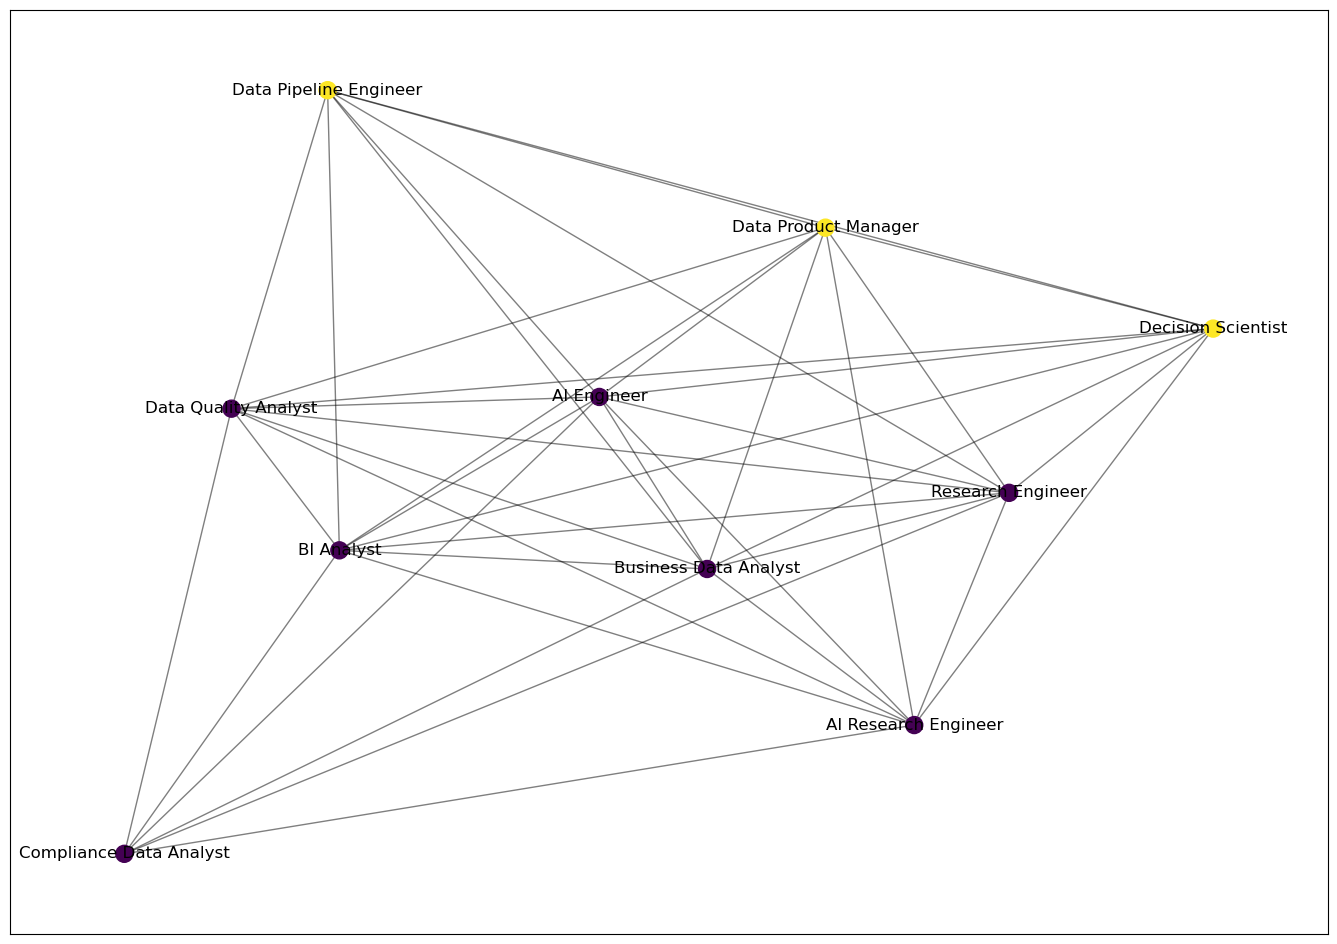

In [24]:
import matplotlib.cm as cm
import matplotlib
import community.community_louvain as community_louvain
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(17, 12))

partition = community_louvain.best_partition(G1)

pos = nx.spring_layout(G1)

cmap= cm.get_cmap('viridis', max(partition.values()) +1)
nx.draw_networkx_nodes(G1, pos, partition.keys(), node_size=150,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G1, pos, alpha=0.5)
nx.draw_networkx_labels(G1, pos)

plt.show()


In [25]:
values = list(partition.values())

print('Số cụm', len(np.unique(values)))

for i in range(len(np.unique(values))):
  print("-- Cụm ", i+1, " --")
  for name, k in partition.items():
    if k ==i:
      print(name)

Số cụm 2
-- Cụm  1  --
BI Analyst
Data Quality Analyst
AI Research Engineer
Research Engineer
AI Engineer
Business Data Analyst
Compliance Data Analyst
-- Cụm  2  --
Decision Scientist
Data Pipeline Engineer
Data Product Manager


In [26]:
List0 = []
for name, k in partition.items():
  if k==0:
    print(name)
    List0.append(name)
Nhom0 = df.query("job_title in @List0")
Nhom0

BI Analyst
Data Quality Analyst
AI Research Engineer
Research Engineer
AI Engineer
Business Data Analyst
Compliance Data Analyst


,experience_level,job_title
9,EN,Research Engineer
37,EN,AI Research Engineer
50,MI,Business Data Analyst
82,MI,Research Engineer
91,SE,Research Engineer
131,MI,AI Engineer
137,SE,AI Engineer
179,SE,BI Analyst
1421,EX,AI Engineer
2966,MI,AI Research Engineer


In [27]:
List1 = []
for name, k in partition.items():
  if k==1:
    print(name)
    List1.append(name)
Nhom1 = df.query("job_title in @List1")
Nhom1

Decision Scientist
Data Pipeline Engineer
Data Product Manager


,experience_level,job_title
1104,MI,Data Product Manager
1786,SE,Data Product Manager
2743,MI,Decision Scientist
2759,SE,Decision Scientist
4588,SE,Data Pipeline Engineer


In [28]:
# Write the first dataframe to Excel
df.to_excel('Louvain_Cum.xlsx', sheet_name='pah_wikp_combo', index=False, header=True)

# Create an ExcelWriter object in append mode
with pd.ExcelWriter('Louvain_Cum.xlsx', mode='a', engine='openpyxl') as writer:
    # Write the second dataframe to a new sheet
    Nhom0.to_excel(writer, sheet_name='Louvain_Nhom1', index=False, header=True)
    # Write the third dataframe to another new sheet
    Nhom1.to_excel(writer, sheet_name='Louvain_Nhom2', index=False, header=True)


## Girven Newman

[['Data Quality Analyst', 'Data Product Manager', 'BI Analyst', 'AI Engineer', 'Business Data Analyst', 'AI Research Engineer', 'Decision Scientist', 'Research Engineer', 'Data Pipeline Engineer'], ['Compliance Data Analyst']]


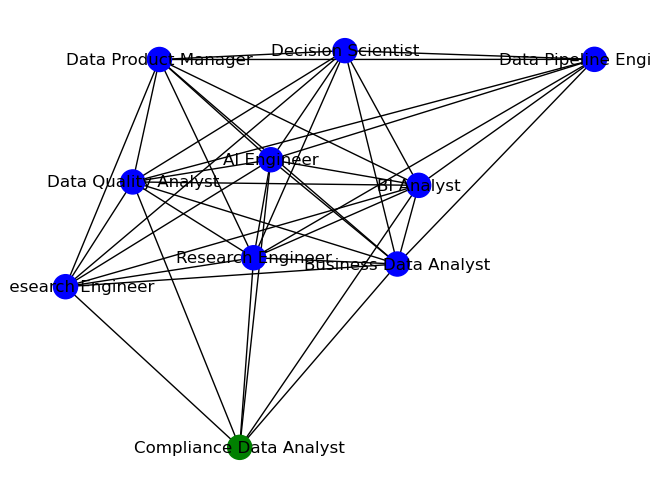

In [28]:
from networkx.algorithms.community.centrality import girvan_newman

communities = girvan_newman(G1)

node_groups = []
for com in next(communities):
  node_groups.append(list(com))

print(node_groups)

color_map = []
for node in G1:
    if node in node_groups[0]:
        color_map.append('blue')
    else: 
        color_map.append('green')  
nx.draw(G1, node_color=color_map, with_labels=True)
plt.show()

## K-Means

In [29]:
df = pd.read_csv("DataScience_salaries_2024.csv", usecols = ['experience_level', 'job_title'])
df.drop_duplicates(inplace = True)

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.cluster import KMeans

In [32]:
temp_df = df.copy()

In [33]:
def Label_enc(feat):
    LabelE = LabelEncoder()
    LabelE.fit(feat)
    print(feat.name,LabelE.classes_)
    return LabelE.transform(feat)

In [34]:
df.columns = ['Encode_Experience_Level' if x=='experience_level' else 'Encode_Job_Title' if x=='job_title' else x for x in df.columns]
df

,Encode_Experience_Level,Encode_Job_Title
0,MI,Data Scientist
1,MI,BI Data Analyst
3,MI,ML Engineer
4,SE,Lead Machine Learning Engineer
6,SE,Data Science Manager
...,...,...
14751,EN,Data Analytics Manager
14800,EN,Data Quality Engineer
14818,EN,Data Analytics Engineer
14823,EN,Data Analyst Lead


In [35]:
for col in df.columns:
    df[str(col)] = Label_enc(df[str(col)])

Encode_Experience_Level ['EN' 'EX' 'MI' 'SE']
Encode_Job_Title ['AI Architect' 'AI Developer' 'AI Engineer' 'AI Product Manager'
 'AI Programmer' 'AI Research Engineer' 'AI Research Scientist'
 'AI Scientist' 'AI Software Engineer' 'AWS Data Architect'
 'Admin & Data Analyst' 'Analytics Engineer'
 'Analytics Engineering Manager' 'Applied Data Scientist'
 'Applied Machine Learning Engineer' 'Applied Machine Learning Scientist'
 'Applied Research Scientist' 'Applied Scientist'
 'Autonomous Vehicle Technician' 'Azure Data Engineer' 'BI Analyst'
 'BI Data Analyst' 'BI Data Engineer' 'BI Developer' 'Big Data Architect'
 'Big Data Developer' 'Big Data Engineer' 'Business Data Analyst'
 'Business Intelligence' 'Business Intelligence Analyst'
 'Business Intelligence Data Analyst' 'Business Intelligence Developer'
 'Business Intelligence Engineer' 'Business Intelligence Lead'
 'Business Intelligence Manager' 'Business Intelligence Specialist'
 'CRM Data Analyst' 'Cloud Data Architect' 'Cloud Da

In [36]:
df.head()

,Encode_Experience_Level,Encode_Job_Title
0,2,89
1,2,21
3,2,114
4,3,113
6,3,86


In [37]:
df02 = pd.concat([temp_df, df],axis=1)

In [38]:
df02

,experience_level,job_title,Encode_Experience_Level,Encode_Job_Title
0,MI,Data Scientist,2,89
1,MI,BI Data Analyst,2,21
3,MI,ML Engineer,2,114
4,SE,Lead Machine Learning Engineer,3,113
6,SE,Data Science Manager,3,86
...,...,...,...,...
14751,EN,Data Analytics Manager,0,51
14800,EN,Data Quality Engineer,0,77
14818,EN,Data Analytics Engineer,0,49
14823,EN,Data Analyst Lead,0,46


In [39]:
X = df02[['Encode_Experience_Level', 'Encode_Job_Title']].iloc[:,:].values
inertia=[]
for n in range (1,11):
    algorithm = KMeans(n_clusters =n, init='random')
    algorithm.fit(X)
    inertia.append(algorithm.inertia_)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

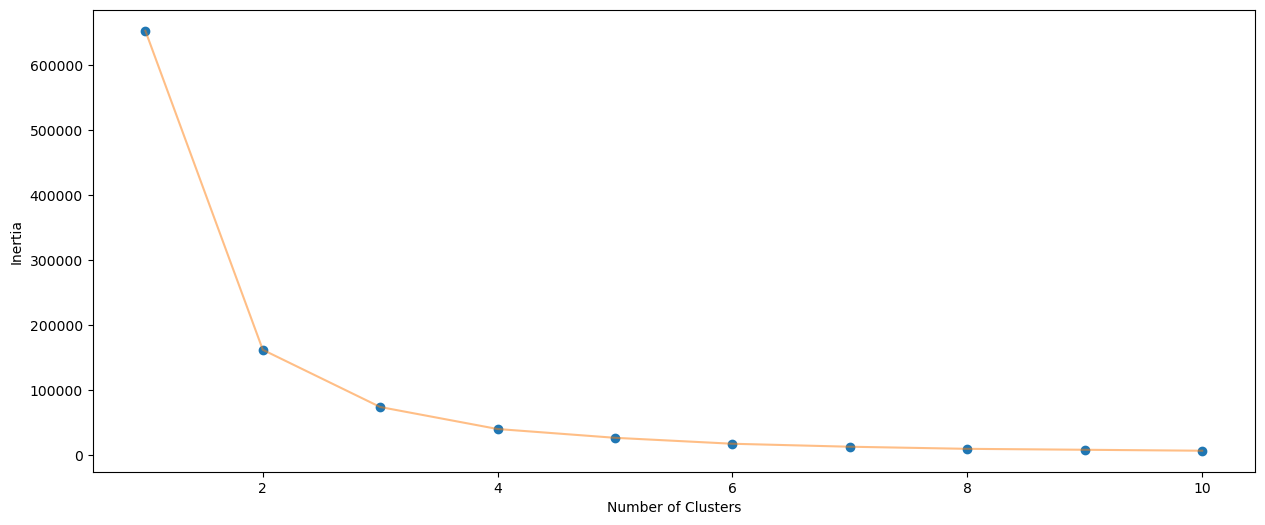

In [40]:
plt.figure(1, figsize = (15,6))
plt.plot(np.arange(1,11), inertia, 'o')
plt.plot(np.arange(1,11), inertia, '-',alpha=0.5)
plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
plt.show()

In [41]:
algorithm = KMeans(n_clusters =2, init='random')
algorithm.fit(X)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [42]:
df02.columns

Index(['experience_level', 'job_title', 'Encode_Experience_Level',
       'Encode_Job_Title'],
      dtype='object')

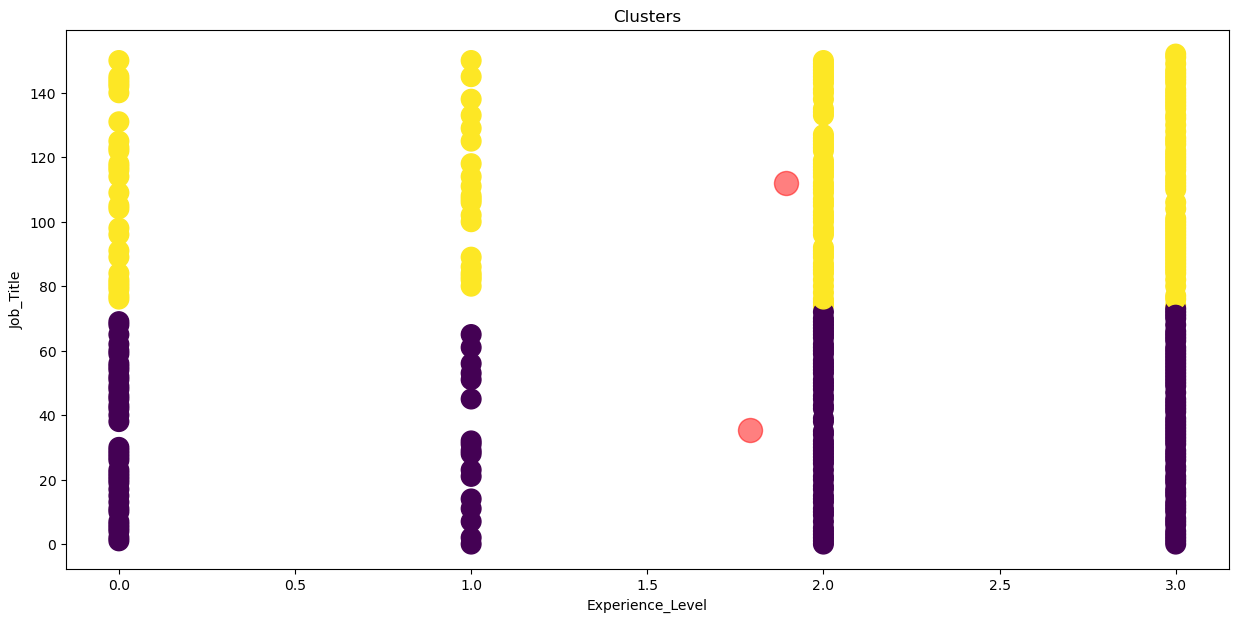

In [43]:
#Biểu diễn kết quả gom cụm
plt.figure(1, figsize = (15,7))
plt.clf()
plt.scatter(x='Encode_Experience_Level', y='Encode_Job_Title', data=df02, s=200, c=labels1)
plt.scatter(centroids1[:,0], centroids1[:,1], s=300, c='red', alpha=0.5)
plt.xlabel('Experience_Level'), plt.ylabel('Job_Title')
plt.title('Clusters')
plt.show()

In [44]:
df02['Clusters'] = algorithm.labels_

df02.to_excel (r'Kmean.xlsx', sheet_name='cluster', index = False, header=True)

Groupkmean0 = df02.query("Clusters == 0")
Groupkmean1 = df02.query("Clusters == 1")
Groupkmean2 = df02.query("Clusters == 2")

with pd.ExcelWriter('Kmean.xlsx',
                    mode='a') as writer:
    Groupkmean0.to_excel(writer, sheet_name='cluster0',index = False, header=True)
    Groupkmean1.to_excel(writer, sheet_name='cluster1',index = False, header=True)
    Groupkmean2.to_excel(writer, sheet_name='cluster2',index = False, header=True)
